Prima Facciata

1. (0.5 pt.) Caricare in un dataframe le informazioni presenti nel foglio ‘customers’ del file BikeStores
presenta al link
https://github.com/wtitze/3E/blob/main/BikeStores.xls?raw=true
e di cui si riportano i primi record

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel('https://github.com/wtitze/3E/blob/main/BikeStores.xls?raw=true',sheet_name='customers')
df

,customer_id,first_name,last_name,phone,email,street,city,state,zip_code
0,1,Debra,Burks,NaN,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127.0
1,2,Kasha,Todd,NaN,kasha.todd@yahoo.com,910 Vine Street,Campbell,CA,95008.0
2,3,Tameka,Fisher,NaN,tameka.fisher@aol.com,769C Honey Creek St.,Redondo Beach,CA,90278.0
3,4,Daryl,Spence,NaN,daryl.spence@aol.com,988 Pearl Lane,Uniondale,NY,11553.0
4,5,Charolette,Rice,(916) 381-6003,charolette.rice@msn.com,107 River Dr.,Sacramento,CA,95820.0
...,...,...,...,...,...,...,...,...,...
1440,1441,Jamaal,Morrison,NaN,jamaal.morrison@msn.com,796 SE. Nut Swamp St.,Staten Island,NY,10301.0
1441,1442,Cassie,Cline,NaN,cassie.cline@gmail.com,947 Lafayette Drive,Brooklyn,NY,11201.0
1442,1443,Lezlie,Lamb,NaN,lezlie.lamb@gmail.com,401 Brandywine Street,Central Islip,NY,11722.0
1443,1444,Ivette,Estes,NaN,ivette.estes@gmail.com,88 N. Canterbury Ave.,Canandaigua,NY,14424.0


2. (1 pt.) Visualizzare i nominativi dei clienti di cui non si conosce né il numero di telefono né la mail

In [2]:
df[(df['phone'].isnull())&(df['email'].isnull())]['first_name']

180    Olevia
184    Morton
238    Felice
239        Le
Name: first_name, dtype: object

3. (1 pt.) Visualizzare l’indirizzo dei clienti che usano gmail come propria mail personale

In [3]:
df[df['email'].str.contains('gmail',na=False)]['first_name']

9       Pamelia
14       Linnie
20        Tobie
21       Adelle
24      Regenia
         ...   
1428     Lorrie
1441     Cassie
1442     Lezlie
1443     Ivette
1444      Ester
Name: first_name, Length: 304, dtype: object

4. (0.5 pt.) Eliminare la colonna customer_id dal dataframe

In [4]:
df1 = df.drop(columns=('customer_id'))
df1

,first_name,last_name,phone,email,street,city,state,zip_code
0,Debra,Burks,NaN,debra.burks@yahoo.com,9273 Thorne Ave.,Orchard Park,NY,14127.0
1,Kasha,Todd,NaN,kasha.todd@yahoo.com,910 Vine Street,Campbell,CA,95008.0
2,Tameka,Fisher,NaN,tameka.fisher@aol.com,769C Honey Creek St.,Redondo Beach,CA,90278.0
3,Daryl,Spence,NaN,daryl.spence@aol.com,988 Pearl Lane,Uniondale,NY,11553.0
4,Charolette,Rice,(916) 381-6003,charolette.rice@msn.com,107 River Dr.,Sacramento,CA,95820.0
...,...,...,...,...,...,...,...,...
1440,Jamaal,Morrison,NaN,jamaal.morrison@msn.com,796 SE. Nut Swamp St.,Staten Island,NY,10301.0
1441,Cassie,Cline,NaN,cassie.cline@gmail.com,947 Lafayette Drive,Brooklyn,NY,11201.0
1442,Lezlie,Lamb,NaN,lezlie.lamb@gmail.com,401 Brandywine Street,Central Islip,NY,11722.0
1443,Ivette,Estes,NaN,ivette.estes@gmail.com,88 N. Canterbury Ave.,Canandaigua,NY,14424.0


Seconda Facciata

5. (1.5 pt) Calcolare il numero di clienti per ogni stato e visualizzare queste informazioni in un pie chart.
Dare un nome appropriato al titolo del grafico

In [5]:
df3 = df.groupby('state',as_index=False)['first_name'].count()
df3

,state,first_name
0,CA,284
1,NY,1019
2,TX,142


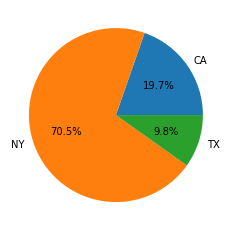

In [6]:
fig = plt.figure()
ax = plt.axes()
ax.pie(df3['first_name'],labels =df3['state'],autopct='%1.1f%%')
plt.show()

(1.5 pt) Calcolare il numero di clienti di ogni città. Visualizzare il nome della città e il numero di clienti
che risiedono in quella città. Ordinare in ordine decrescente sul numero di clienti e visualizzare le
informazioni in un grafico a barre orizzontali. Dare un nome appropriato al titolo del grafico e agli assi

In [7]:
df4 = df.groupby('city',as_index=False)['first_name'].count().sort_values('first_name',ascending=False)
df4

,city,first_name
102,Mount Vernon,20
12,Ballston Spa,17
159,Scarsdale,17
23,Canandaigua,14
118,Ossining,13
...,...,...
49,Far Rockaway,2
173,Tonawanda,1
99,Middle Village,1
188,Westbury,1


<BarContainer object of 195 artists>

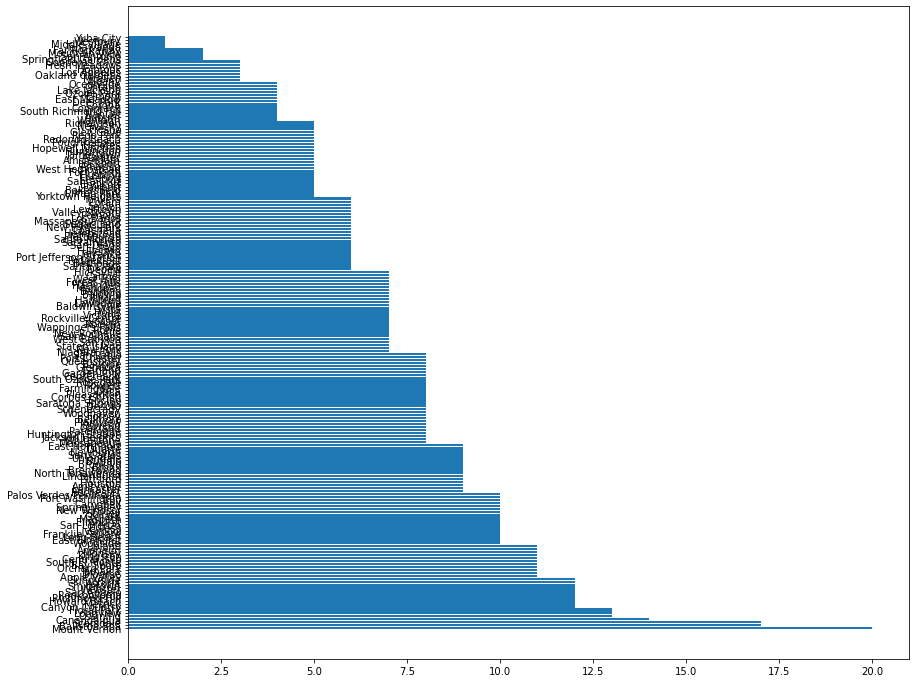

In [8]:
fig = plt.figure(figsize=(14,12))
ax = plt.axes()



ax.barh(df4['city'],df4['first_name'])

Terza Facciata

7. (1 pt.) Visualizzare le città che hanno un numero di clienti compreso tra 10 e 20. Visualizzare il nome
della città e il numero di clienti.

In [9]:
df4[(df4['first_name']>=10)&(df4['first_name']<=20)]

,city,first_name
102,Mount Vernon,20
12,Ballston Spa,17
159,Scarsdale,17
23,Canandaigua,14
118,Ossining,13
90,Longview,13
51,Floral Park,13
24,Canyon Country,12
98,Merrick,12
74,Howard Beach,12


8. (1 pt.) Calcolare il numero di città per ogni stato. Visualizzare il nome dello stato e il numero delle
città

In [10]:
df5 = df.groupby('state',as_index=False)['city'].count()
df5

,state,city
0,CA,284
1,NY,1019
2,TX,142


9. (1 pt.) Eliminare dal dataframe tutti i clienti di Buffalo di cui non si conosce il telefono